# Importing libraries


In [0]:
#Importing the relevant libraries to be used in the analysis
#
import pandas as pd

import numpy as np

# Loading the datasets

In [0]:
#The following lines will load the csv files and create the dataframe to be used
#and preview the first 10 records
#
url ='http://bit.ly/Autolibdataset'
elec_car = pd.read_csv(url)
elec_car.head(10)

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
5,5,44 Rue des Pirogues de Bercy,1,1,0,0,2,operational,Paris,NaN,paris-piroguesdebercy-44,STATION,"48.8334137, 2.388111",75012,Paris/Pirogues de Bercy/44,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
6,6,63 Boulevard Richard Lenoir,1,1,0,0,2,operational,Paris,NaN,paris-richardlenoir-63,STATION,"48.86023, 2.3719914",75011,Paris/Richard Lenoir/63,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
7,7,43 Rue de Monceau,0,0,0,0,2,operational,Paris,NaN,paris-monceau-43,STATION,"48.8778333, 2.310832",75008,Paris/Monceau/43,operational,NaN,6,station,ok,nonexistent,2018,4,1,0,0
8,8,10 Avenue du Docteur Arnold Netter,4,4,0,0,0,operational,Paris,NaN,paris-arnoldnetter-10,STATION,"48.8415951, 2.4050137",75012,Paris/Arnold Netter/10,operational,NaN,0,station,ok,nonexistent,2018,4,1,0,0
9,9,33 Avenue Pierre 1er de Serbie,2,2,0,0,1,operational,Paris,NaN,paris-pierre1erdeserbie-33,STATION,"48.8673767, 2.2988559",75016,Paris/Pierre 1er de Serbie/33,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0


In [0]:
#Getting information about the dataset entries
#
elec_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14421829 entries, 0 to 14421828
Data columns (total 26 columns):
Unnamed: 0             int64
Address                object
Cars                   int64
Bluecar counter        int64
Utilib counter         int64
Utilib 1.4 counter     int64
Charge Slots           int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code            int64
Public name            object
Rental status          object
Scheduled at           object
Slots                  int64
Station type           object
Status                 object
Subscription status    object
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
dtypes: int64(13), object(13)
memory usage: 2.8+ GB


## Data Cleaning


# Validity

In [0]:
#Dropping Displayed comment,Geo point and Scheduled at columns
#as they are not relevant in the analysis
#
elec_car = elec_car.drop(['Displayed comment','Geo point','Scheduled at','Public name','Unnamed: 0'],axis=1)

In [0]:
#Viewing the column names to confirm the irrelevant columns have been dropped
#
elec_car.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Postal code', 'Rental status', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

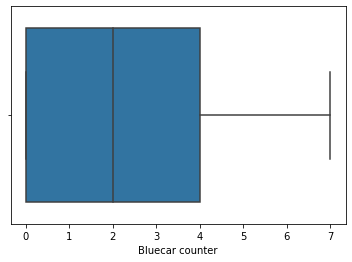

In [0]:
#Checking for any outiers in the number of bluecars counted
#No outliers presnt hence no action taken
#
import seaborn as sns

bplot = sns.boxplot(x=elec_car['Bluecar counter'])

# Uniformity and standardization

In [0]:
#The following code will remove the white spaces, leading and trailing spaces
#from the column names and
#change the column names to lower case
elec_car.columns = elec_car.columns.str.strip().str.lower().str.replace(' ','_')

In [0]:
#Viewing the column names to confirm the changes made
#
elec_car.columns

Index(['address', 'cars', 'bluecar_counter', 'utilib_counter',
       'utilib_1.4_counter', 'charge_slots', 'charging_status', 'city', 'id',
       'kind', 'postal_code', 'rental_status', 'slots', 'station_type',
       'status', 'subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

# Completeness

In [0]:
#Checking for missing values in the records
#no missing values hence no action taken
#
elec_car.isnull().sum()

address                0
cars                   0
bluecar_counter        0
utilib_counter         0
utilib_1.4_counter     0
charge_slots           0
charging_status        0
city                   0
id                     0
kind                   0
postal_code            0
rental_status          0
slots                  0
station_type           0
status                 0
subscription_status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

# Consistency

In [0]:
#Checking for duplicated entries in the dataset
#
elec_car.duplicated().sum()

142890

In [0]:
#Dropping the duplicated records to increase the accuracy during analysis
#and then confirming there are no duplicated entries
#
elec_cars = elec_car.drop_duplicates()

elec_cars.duplicated().sum()

0

In [0]:
#Previewing the cleaned dataset to be used for the analysis
#
elec_cars.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute
0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,paris-vulpian-24,STATION,75013,operational,1,station,ok,nonexistent,2018,4,1,0,0
1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,paris-richardlenoir-8,STATION,75011,operational,3,station,ok,nonexistent,2018,4,1,0,0
2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,paris-charlesbossut-4,STATION,75012,operational,2,station,ok,nonexistent,2018,4,1,0,0
3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,paris-claudevellefaux-3,STATION,75010,operational,1,station,ok,nonexistent,2018,4,1,0,0
4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,paris-voltaire-236,STATION,75011,operational,4,station,ok,nonexistent,2018,4,1,0,0


# Exporting the clean data

In [0]:
# Exporting the clean dataframe into a csv file 
#
elec_cars.to_csv('elec_cars.csv')

## Data Analysis

In [0]:
#Loading the new dataframe
#
elec_car = pd.read_csv('/content/elec_cars.csv')

In [0]:
#Creating new columns to compute the usage of the cars as the hours progressed
#positive shows cars were returned in that hour
#negative indicates they were picked up within the hour and
#zero shows nothing happened in that hour
#
elec_car['blue_car'] = elec_car['bluecar_counter'].diff()
elec_car['utilib'] = elec_car['utilib_counter'].diff()
elec_car['utilib_1.4'] = elec_car['utilib_1.4_counter'].diff()
elec_car[['bluecar_counter','blue_car','utilib_counter','utilib','utilib_1.4_counter','utilib_1.4']]

,bluecar_counter,blue_car,utilib_counter,utilib,utilib_1.4_counter,utilib_1.4
0,3,NaN,1,NaN,0,NaN
1,0,-3.0,0,-1.0,0,0.0
2,3,3.0,0,0.0,0,0.0
3,4,1.0,0,0.0,0,0.0
4,1,-3.0,0,0.0,0,0.0
...,...,...,...,...,...,...
14278934,0,0.0,0,0.0,0,0.0
14278935,4,4.0,0,0.0,0,0.0
14278936,6,2.0,0,0.0,0,0.0
14278937,2,-4.0,0,0.0,0,0.0


# Picking up Bluecars

In [0]:
#Popular Hour
#The line below computes the most popular hour for picking up Bluecars in Paris
#
pop_hr = elec_car[(elec_car.city == 'Paris') & (elec_car.blue_car < 0)].groupby(['hour'])['blue_car'].sum()
pop_hr.sort_values(ascending = False).head(1)

hour
19   -349299.0
Name: blue_car, dtype: float64

The most popular hour for picking up Bluecars was 7pm in Paris.

In [0]:
#Popular station- Overall
#The line below computes the most popular station for picking up Bluecars 
#in Paris 
#
pop_station = elec_car[(elec_car.city == 'Paris') & (elec_car.blue_car < 0) & (elec_car.kind == 'STATION') & 
                       (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station.sort_values(ascending = False).head(1)

id
paris-saintecroixdelabretonnerie-37    10652
Name: id, dtype: int64

The most popular station in general for picking up Bluecars in Paris was 'paris-saintecroixdelabretonnerie-37'

In [0]:
#Postal code
#This code will show the postal code of the station obtained in the previous scenario
#
postal_code = elec_car[(elec_car.id == 'paris-saintecroixdelabretonnerie-37') & (elec_car.kind == 'STATION') & 
                       (elec_car.blue_car < 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False)

postal_code
75004    10652
Name: postal_code, dtype: int64

The postal address for the station above was 75004.

In [0]:
#Popular station- Picking up hour
#The line below computes the most popular station for picking up Bluecars 
#in Paris during the most popular picking up hour
#
pop_station2 = elec_car[(elec_car.city == 'Paris') & (elec_car.blue_car < 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 19) & 
                        (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station2.sort_values(ascending = False).head(1)

id
paris-victoire-76    460
Name: id, dtype: int64

The popular station during the most popular picking up hour was 'paris-victoire-76'.

In [27]:
#Postal code
#This code will show the postal code of the station obtained in the previous scenario
#
postal_code2 = elec_car[(elec_car.id == 'paris-victoire-76') & (elec_car.blue_car < 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 19)].groupby(['postal_code'])['postal_code'].count()
postal_code2.sort_values(ascending = False)

postal_code
75009    460
Name: postal_code, dtype: int64

The postal address for the station above was 75009.

# Returning Bluecars

In [0]:
#Popular Hour
#The line below computes the most popular hour for returning Bluecars in Paris
#
pop_hr = elec_car[(elec_car.city == 'Paris') & (elec_car.blue_car > 0)].groupby(['hour'])['blue_car'].sum()
pop_hr.sort_values(ascending = False).head(1)

hour
4    307046.0
Name: blue_car, dtype: float64

The most popular hour for returning Bluecars was 4am in Paris.

In [0]:
#Popular station- Overall
#The line below computes the most popular station for returning Bluecars 
#in Paris 
#
pop_station = elec_car[(elec_car.city == 'Paris') & (elec_car.blue_car > 0) & 
                       (elec_car.kind == 'STATION')].groupby(['id'])['id'].count()
pop_station.sort_values(ascending = False).head(1)

id
paris-versailles-112    10306
Name: id, dtype: int64

The most popular station for returning bluecars in general was 'paris-versailles-112'.

In [0]:
#Postal code
#This code will show the postal code of the station obtained in the previous scenario
#
postal_code = elec_car[(elec_car.id == 'paris-versailles-112') & (elec_car.kind == 'STATION') & 
                       (elec_car.blue_car > 0)].groupby(['postal_code'])['postal_code'].count()
postal_code.sort_values(ascending = False)

postal_code
75016    10306
Name: postal_code, dtype: int64

The postal code for the station above was 75016.

In [28]:
#Popular station- Picking up hour
#The line below computes the most popular station for returning Bluecars 
#in Paris during the most popular picking up hour
#
pop_station2 = elec_car[(elec_car.city == 'Paris') & (elec_car.blue_car > 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 4) & 
                        (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station2.sort_values(ascending = False).head(1)

id
paris-poteau-40    540
Name: id, dtype: int64

The popular station during the most popular hour of returning bluecars was 'paris-poteau-40'.

In [30]:
#Postal code
#This code will show the postal code of the station obtained in the previous scenario
#
postal_code3 = elec_car[(elec_car.id == 'paris-poteau-40') & (elec_car.blue_car > 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 4) & 
                        (elec_car.status == 'ok')].groupby(['postal_code'])['postal_code'].count()
postal_code3.sort_values(ascending = False)

postal_code
75018    540
Name: postal_code, dtype: int64

The postal code for the above station was 75018.

# Picking up Utilib cars

In [31]:
#Popular Hour
#The line below computes the most popular hour for picking up utilib cars in Paris
#
pop_hr = elec_car[(elec_car.city == 'Paris') & (elec_car.utilib < 0)].groupby(['hour'])['utilib'].sum()
pop_hr.sort_values(ascending = False).head(1)

hour
18   -15952.0
Name: utilib, dtype: float64

The most popular hour for picking up utilib cars was 6pm in Paris.

In [0]:
#Popular station- Overall
#The line below computes the most popular station for picking up utilib cars 
#in Paris 
#
pop_station = elec_car[(elec_car.city == 'Paris') & (elec_car.utilib < 0) & (elec_car.kind == 'STATION') & 
                       (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station.sort_values(ascending = False).head(1)

id
paris-haussmann-6    2123
Name: id, dtype: int64

The most popular station in general for picking up utilib cars was 'paris-haussmann-6'.

In [32]:
#Popular station- Picking up hour
#The line below computes the most popular station for picking up utilib cars 
#in Paris during the most popular picking up hour
#
pop_station2 = elec_car[(elec_car.city == 'Paris') & (elec_car.utilib < 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 18) & 
                        (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station2.sort_values(ascending = False).head(1)

id
paris-tourmaubourg-76    139
Name: id, dtype: int64

The popular station during the most popular hour for picking utilib cars was also 'paris-tourmaubourg-76'.    

# Returning utilib cars

In [33]:
#Popular Hour
#The line below computes the most popular hour for returning utilib cars in Paris
#
pop_hr = elec_car[(elec_car.city == 'Paris') & (elec_car.utilib > 0)].groupby(['hour'])['utilib'].sum()
pop_hr.sort_values(ascending = False).head(1)

hour
7    18424.0
Name: utilib, dtype: float64

The most popular hour for returning utilib cars was 7am in Paris.

In [0]:
#Popular station- Overall
#The line below computes the most popular station for returning utilib cars 
#in Paris 
#
pop_station = elec_car[(elec_car.city == 'Paris') & (elec_car.utilib > 0) & 
                       (elec_car.kind == 'STATION')].groupby(['id'])['id'].count()
pop_station.sort_values(ascending = False).head(1)

id
paris-sibelle-29    4220
Name: id, dtype: int64

The most popular station in general for returning cars was 'paris-sibelle-29'.

In [0]:
#Popular station- Returning hour
#The line below computes the most popular station for returning utilib cars 
#in Paris during the most popular picking up hour
#
pop_station2 = elec_car[(elec_car.city == 'Paris') & (elec_car.utilib > 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 7) & 
                        (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station2.sort_values(ascending = False).head(1)

id
paris-tolbiac-189    226
Name: id, dtype: int64

The most popular station at the popular hour for returning cars was 'paris-tolbiac-189'.

# Picking up utilib_1.4

In [35]:
#Popular Hour
#The line below computes the most popular hour for picking up utilib_1.4 cars in Paris
#
pop_hr = elec_car[(elec_car.city == 'Paris') & (elec_car['utilib_1.4'] < 0)].groupby(['hour'])['utilib_1.4'].sum()
pop_hr.sort_values(ascending = False).head(1)

hour
19   -30451.0
Name: utilib_1.4, dtype: float64

The most popular hour for picking up utilib_1.4 is 7pm in Paris.

In [0]:
#Popular station- Overall
#The line below computes the most popular station for picking up utilib_1.4 cars 
#in Paris 
#
pop_station = elec_car[(elec_car.city == 'Paris') & (elec_car['utilib_1.4'] < 0) & (elec_car.kind == 'STATION') & 
                       (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station.sort_values(ascending = False).head(1)

id
paris-turenne-98    3265
Name: id, dtype: int64

The most popular station for picking up utilib_1.4 is 'paris-turenne-98'.

In [36]:
#Popular station- Picking up hour
#The line below computes the most popular station for picking up utilib_1.4 cars 
#in Paris during the most popular picking up hour
#
pop_station2 = elec_car[(elec_car.city == 'Paris') & (elec_car['utilib_1.4'] < 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 19) & 
                        (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station2.sort_values(ascending = False).head(1)

id
paris-courcelles-40    189
Name: id, dtype: int64

The most popular station for picking up utilib_1.4 at the popular hour is 'paris-courcelles-40'.

# Returning utilib_1.4

In [38]:
#Popular Hour
#The line below computes the most popular hour for returning utilib_1.4 cars in Paris
#
pop_hr = elec_car[(elec_car.city == 'Paris') & (elec_car['utilib_1.4'] > 0)].groupby(['hour'])['utilib_1.4'].sum()
pop_hr.sort_values(ascending = False).head(1)

hour
6    36076.0
Name: utilib_1.4, dtype: float64

The most popular hour for returning utilib_1.4 is 6am.

In [0]:
#Popular station- Overall
#The line below computes the most popular station for returning utilib_1.4 cars 
#in Paris 
#
pop_station = elec_car[(elec_car.city == 'Paris') & (elec_car['utilib_1.4'] > 0) & 
                       (elec_car.kind == 'STATION')].groupby(['id'])['id'].count()
pop_station.sort_values(ascending = False).head(1)

id
paris-portedemontrouge-8    5640
Name: id, dtype: int64

The most popular station for returning utilib_1.4 in general is 'paris-portedemontrouge-8'.

In [0]:
#Popular station- Returning hour
#The line below computes the most popular station for returning utilib_1.4 cars 
#in Paris during the most popular picking up hour
#
pop_station2 = elec_car[(elec_car.city == 'Paris') & (elec_car['utilib_1.4'] > 0) & 
                        (elec_car.kind == 'STATION') & (elec_car.hour == 6) & 
                        (elec_car.status == 'ok')].groupby(['id'])['id'].count()
pop_station2.sort_values(ascending = False).head(1)

id
paris-marcadet-220    298
Name: id, dtype: int64

The most popular station for returning utilib_1.4 at the popular hour is 'paris-marcadet-220'.